# Correlation Matrix

In [1]:
%%capture
import pandas as pd
import data_describe as dd

In [2]:
from sklearn.datasets import load_boston
data = load_boston()
df = pd.DataFrame(data.data, columns=list(data.feature_names))
df['target'] = data.target

#Bin values
df['AGE'] = df['AGE'].map(lambda x: "young" if x < 29 else "old")
df['CRIM'] = df['CRIM'].map(lambda x: "low" if x < df.CRIM.median() else "high")
#Convert to integer
df['ZN'] = df['ZN'].astype(int)

In [3]:
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,low,18,2.31,0.0,0.538,6.575,old,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,low,0,7.07,0.0,0.469,6.421,old,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


## Default

final root:{'score_threshold': 0.2, 'enable_trace_pii': None, 'sample_size': None}
final root:{'score_threshold': 0.2, 'enable_trace_pii': True, 'sample_size': None}
final root:{'score_threshold': 0.2, 'enable_trace_pii': True, 'sample_size': 100}
[2020-08-12 12:50:48,612][presidio][INFO]nlp_engine not provided. Creating new SpacyNlpEngine instance


[2020-08-12 12:50:48,621][presidio][INFO]Loading NLP model: spaCy en_core_web_lg



===================== Info about model 'en_core_web_lg' =====================

lang             en                            
name             core_web_lg                   
license          MIT                           
author           Explosion                     
url              https://explosion.ai          
email            contact@explosion.ai          
description      English multi-task CNN trained on OntoNotes, with GloVe vectors trained on Common Crawl. Assigns word vectors, context-specific token vectors, POS tags, dependency parse and named entities.
sources          [{'name': 'OntoNotes 5', 'url': 'https://catalog.ldc.upenn.edu/LDC2013T19', 'license': 'commercial (licensed by Explosion)'}, {'name': 'Common Crawl'}]
pipeline         ['tagger', 'parser', 'ner']   
version          2.2.5                         
spacy_version    >=2.2.2                       
parent_package   spacy                         
labels           {'tagger': ['$', "''", ',', '-LRB-', '-RRB-', '

[2020-08-12 12:50:59,448][presidio][INFO]Recognizer registry not provided. Creating default RecognizerRegistry instance


[2020-08-12 12:50:59,448][presidio][INFO]Loaded recognizer: CreditCardRecognizer


[2020-08-12 12:50:59,449][presidio][INFO]Loaded recognizer: CryptoRecognizer


[2020-08-12 12:50:59,450][presidio][INFO]Loaded recognizer: DomainRecognizer


[2020-08-12 12:50:59,450][presidio][INFO]Loaded recognizer: EmailRecognizer


[2020-08-12 12:50:59,451][presidio][INFO]Loaded recognizer: IbanRecognizer


[2020-08-12 12:50:59,451][presidio][INFO]Loaded recognizer: IpRecognizer


[2020-08-12 12:50:59,452][presidio][INFO]Loaded recognizer: NhsRecognizer


[2020-08-12 12:50:59,453][presidio][INFO]Loaded recognizer: UsBankRecognizer


[2020-08-12 12:50:59,453][presidio][INFO]Loaded recognizer: UsLicenseRecognizer


[2020-08-12 12:50:59,454][presidio][INFO]Loaded recognizer: UsItinRecognizer


[2020-08-12 12:50:59,454][presidio][INFO]Loaded recognizer: UsPassportRecognizer


[2020-08-12 12:50:59,455][presidio][INFO]Loaded recognizer: UsPhoneRecognizer


[2020-08-12 12:50:59,455][presidio][INFO]Loaded recognizer: UsSsnRecognizer


[2020-08-12 12:50:59,456][presidio][INFO]Loaded recognizer: SpacyRecognizer


[2020-08-12 12:50:59,456][presidio][INFO]Loaded recognizer: SgFinRecognizer


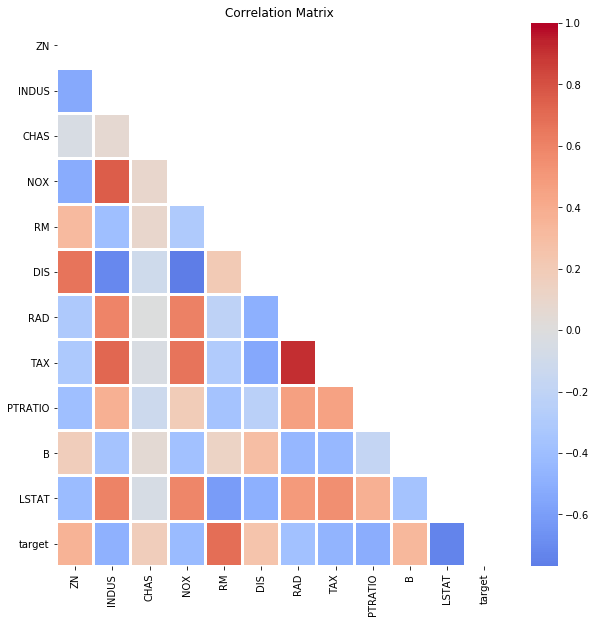

In [4]:
dd.correlation_matrix(df)

## Enable clustering

In [5]:
dd.correlation_matrix(df, cluster=True, viz_backend="plotly")

None

## Show categorical features
**WARNING**: When using categorical features, the matrix represents strength of association (i.e. in the scale [0, 1]). This is because it is hard to define the meaning of a *negative association* involving a categorical feature.

In [6]:
dd.correlation_matrix(df, categorical=True, viz_backend="plotly")

None

## Return values only

In [7]:
correlation_widget = dd.correlation_matrix(df)
correlation_widget.viz_data

,ZN,INDUS,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
ZN,1.000000,-0.533583,-0.042533,-0.516310,0.312218,0.663845,-0.311712,-0.314338,-0.391203,0.175341,-0.413195,0.360580
INDUS,-0.533583,1.000000,0.062938,0.763651,-0.391676,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.042533,0.062938,1.000000,0.091203,0.091251,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,-0.516310,0.763651,0.091203,1.000000,-0.302188,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,0.312218,-0.391676,0.091251,-0.302188,1.000000,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
DIS,0.663845,-0.708027,-0.099176,-0.769230,0.205246,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,-0.311712,0.595129,-0.007368,0.611441,-0.209847,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,-0.314338,0.720760,-0.035587,0.668023,-0.292048,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536
PTRATIO,-0.391203,0.383248,-0.121515,0.188933,-0.355501,-0.232471,0.464741,0.460853,1.000000,-0.177383,0.374044,-0.507787
B,0.175341,-0.356977,0.048788,-0.380051,0.128069,0.291512,-0.444413,-0.441808,-0.177383,1.000000,-0.366087,0.333461
